#JIAFConsulting.com
#Ignacio Ariznabarreta

# Should your fund invest in Bitcoin?

## 📖 Background
You work as an analyst at an investment fund in New York. Your CFO wants to explore if it is a good idea to invest some of the fund's assets in Bitcoin. You have to prepare a report on this asset and how it compares to the stock market in general.

## 💾 The data
You have access to three files:

#### Bitcoin daily data in US dollars
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the price at the beginning of the trading day
- "high" - the highest price reached that day
- "low" - the lowest price reached that day
- "close" - the price at the closing of the trading day
- "volume" - how many Bitcoin were traded that day

#### S&P 500 daily data
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the index level at the beginning of the trading day
- "high" - the highest level reached that day
- "low" - the lowest level reached that day
- "close" - the level at the closing of the trading day
- "volume" - how many shares in the companies that make up the index were traded that day

#### inflation and gold as monthly data
- "date" - date from September, 2014 to November, 2021
- "gold_usd" - price in usd of gold for that month
- "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

_CPI data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/). Publicly available information_.

In [113]:
import pandas as pd
bitcoin = pd.read_csv('dataset/bitcoin-usd.csv', parse_dates=['date'])
bitcoin.head()

,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [114]:
sp500 = pd.read_csv('dataset/sp500.csv', parse_dates=['date'])
sp500.head()

,date,open,high,low,close,volume
0,2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
1,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
3,2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
4,2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


In [141]:
monthly_data = pd.read_csv('dataset/monthly_data.csv', parse_dates=['date'])
monthly_data.head()

,date,gold_usd,cpi_us
0,2014-09-01,1241.330,237.852
1,2014-10-01,1223.565,238.031
2,2014-11-01,1176.413,237.433
3,2014-12-01,1200.440,236.151
4,2015-01-01,1249.333,234.812


## 💪 Competition challenge
Create a report that covers the following:

1. How does the performance of Bitcoin compare to the S&P 500 and the price of gold?
2. Analyze Bitcoin's returns and volatility profile. Do you believe it could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?
3. The CFO is looking to lower volatility in the fund. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

---------
# Report: Where our found should invest in?
Descriptive Analysis of the returns and volatility of the most well-known instruments

# 0. Before starting, we import everything, and we start with the Data Summary (checking the datatypes and we look for NULL, mainly).

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import math
import pandas as pd

## S&P500

In [117]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1805 non-null   datetime64[ns]
 1   open    1805 non-null   float64       
 2   high    1805 non-null   float64       
 3   low     1805 non-null   float64       
 4   close   1805 non-null   float64       
 5   volume  1805 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 84.7 KB


## BTC

In [118]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2619 non-null   datetime64[ns]
 1   open    2615 non-null   float64       
 2   high    2615 non-null   float64       
 3   low     2615 non-null   float64       
 4   close   2615 non-null   float64       
 5   volume  2615 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 122.9 KB


In [119]:
BTCNullDates=bitcoin[bitcoin.open.isnull()==True].date
BTCNullDates

2039   2020-04-17
2214   2020-10-09
2217   2020-10-12
2218   2020-10-13
Name: date, dtype: datetime64[ns]

## Gold & CPI

In [120]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      87 non-null     datetime64[ns]
 1   gold_usd  87 non-null     float64       
 2   cpi_us    87 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.2 KB


## Summary
- GOLD & CIP are expressed in monthly values, and they have no NULL values.
- SP500 is expressed in daily values, and have no NULL values.
- BTC is also expressed in daily values, and have 4 NULL values. However, 4 over 2619 values make no statistical significance.  

All the values are already expressed as FLOAT and the dates as datetime. No modifications will be required

----------
# 1. How does the performance of Bitcoin compare to the S&P 500 and the price of gold?

## S&P500

We will start analyzing the variations of S&P500

In [211]:
sp500.describe()

,open,high,low,close,volume,day,month,year,return_SP500,%var
count,1805.000000,1805.000000,1805.000000,1805.000000,1.805000e+03,1805.000000,1805.000000,1805.000000,1804.000000,1804.000000
mean,2755.938758,2769.524277,2741.245103,2756.455533,3.844502e+09,15.739612,6.627147,2017.784488,0.000535,0.053476
std,698.212835,701.268104,695.674679,698.850564,9.781460e+08,8.755157,3.425325,2.088821,0.011239,1.123918
min,1833.400024,1847.000000,1810.099976,1829.079956,1.296540e+09,1.000000,1.000000,2014.000000,-0.119841,-11.984055
25%,2123.159912,2129.870117,2114.719971,2124.290039,3.254950e+09,8.000000,4.000000,2016.000000,-0.003170,-0.317023
50%,2664.439941,2682.860107,2648.870117,2663.989990,3.623320e+09,16.000000,7.000000,2018.000000,0.000695,0.069501
75%,3045.750000,3068.669922,3012.590088,3039.419922,4.154240e+09,23.000000,10.000000,2020.000000,0.005264,0.526389
max,4707.250000,4718.500000,4694.390137,4701.700195,9.878040e+09,31.000000,12.000000,2021.000000,0.093828,9.382774


The mean is greater than the median (50%), so the distribution is positively skewed.
This is a common scenario for stocks.
Also, we will be dealing with 1805 values, and the STD (standard) deviation of the close price is 698. This number gives us an idea of the volatility.

### Close Price
We start analyzing the different closing prices along the years

<AxesSubplot:xlabel='date', ylabel='close'>

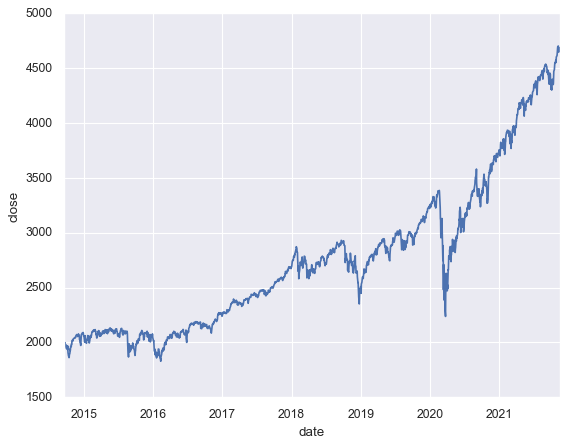

In [122]:
sns.lineplot(data=sp500, x="date", y="close")

We see that the price has been going up. However we see two falls, one right before 2019, and the other one at the begining of the pandemic in 2020.

In [123]:
#We split the date in columns for easier analysis
sp500['day'] = sp500['date'].dt.day
sp500['month'] = sp500['date'].dt.month
sp500['year'] = sp500['date'].dt.year

In [124]:
#We calculate the daily return, as the variation in percentage from closing prices comparing X day with X-1.
sp500['return_SP500']=sp500['close'].pct_change()

In [125]:
sp500.set_index('date',inplace=True)
sp500

,open,high,low,close,volume,day,month,year,return_SP500
date,,,,,,,,,
2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000,17,9,2014,NaN
2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000,18,9,2014,0.004891
2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000,19,9,2014,-0.000477
2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000,22,9,2014,-0.008013
2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000,23,9,2014,-0.005777
...,...,...,...,...,...,...,...,...,...
2021-11-09,4707.250000,4708.529785,4670.870117,4685.250000,3110230000,9,11,2021,-0.003499
2021-11-10,4670.259766,4684.850098,4630.859863,4646.709961,3581630000,10,11,2021,-0.008226
2021-11-11,4659.390137,4664.549805,4648.310059,4649.270020,2623140000,11,11,2021,0.000551


In [126]:
# If you want only to select the first day of the month
# firstDayssp500=sp500.set_index('date').resample('BMS').first()

#We compute the difference between the closing price at the very first day of each month
#firstDayssp500['close_diff'] = firstDayssp500['close'].diff()

#We compute the percentage difference between the closing price at the very first day of each month
#firstDayssp500['close_diff_perc'] = firstDayssp500['close'].pct_change()

We calculate the return of the SP500 per month

In [127]:
#We agroup the AVG percentage difference for each Month
monthSP500Summary=sp500.groupby(['year','month'])[['return_SP500']].sum()
monthSP500Summary

return_SP500
year month              
2014 9         -0.014469
     10         0.024408
     11         0.024312
     12        -0.003205
2015 1         -0.030419
...                  ...
2021 7          0.023055
     8          0.028881
     9         -0.048037
     10         0.067431
     11         0.016783

[87 rows x 1 columns]

<i> We see that in some months the return is positive, while in others the return is negative

We calculate the return of the SP500 per year

In [128]:
#We agroup the AVG percentage difference for each Year
#yearSP500Summary=firstDayssp500.groupby(['year'])[['close_diff_perc']].mean()
yearSP500Summary=sp500.groupby(['year'])[['return_SP500']].sum()
yearSP500Summary

,return_SP500
year,
2014,0.031047
2015,0.004678
2016,0.099646
2017,0.179757
2018,-0.049921
2019,0.261588
2020,0.210538
2021,0.227381


In [129]:
totalSPReturn=yearSP500Summary.sum()
print('The Total return the S%P500 registered between the period {} & {}, was of {:.2f}%'. 
format(sp500.index.min(),sp500.index.max(),totalSPReturn[0]*100))

The Total return the S%P500 registered between the period 2014-09-17 00:00:00 & 2021-11-15 00:00:00, was of 96.47%


### Volatility
With the study of the volatility, we will be able to analyze how big can be the difference across the 'close' prices. With this we will get the risk involved. 
Why risk? Because a wider possibility of values, means I could easily lose a lot of money. This doesn't mean that it will be forever, but in a period of time, it might happen. And, of course, this might impact in the horizon I would like to develop to my portfolio.

But, be carefoul, with bigger risks (big looses), come bigger earnings.

With the following graphic we will see the different returns per year in bars

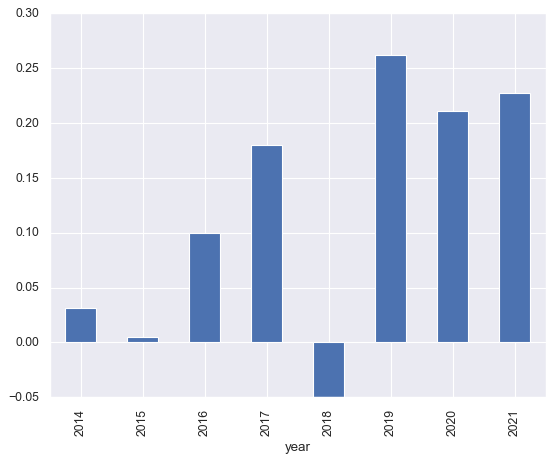

In [130]:
yearSP500Summary['return_SP500'].plot(kind='bar')
plt.show()

We can see that expect in 2018, all the years have a positive return

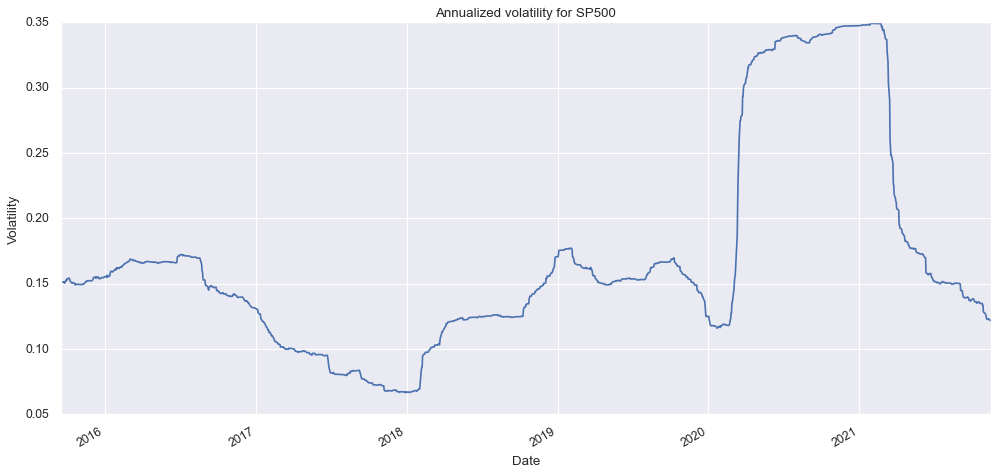

In [131]:
# compute volatility using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 252
returns = np.log(sp500['close']/sp500['close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for SP500')
plt.show()

As we can see the volatility started decreasing in the period 2016:2018.
However the biggest impact was at the beginning of the pandemic, and the high volatility lasted almost a year.

In [132]:
#We create the column of % of variation from the index of variation
sp500['%var']=sp500['return_SP500']*100

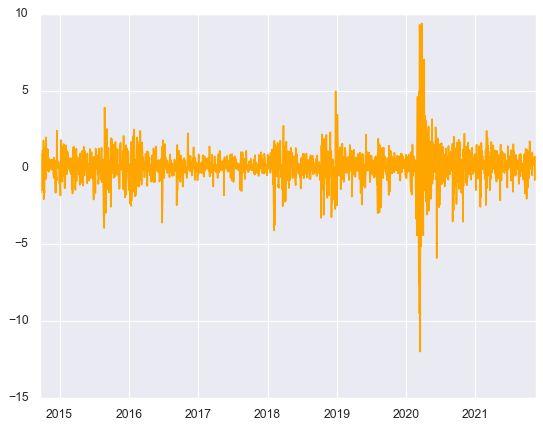

Daily volatility:  1.12%
Monthly volatility:  5.15%
Annual volatility:  17.84%


In [133]:
# Plot the price returns
plt.plot(sp500['%var'], color = 'orange')
plt.show()

# Calculate daily std of returns
sp500_std_daily = sp500['%var'].std()
print('Daily volatility: ', '{:.2f}%'.format(sp500_std_daily))

# Convert daily volatility to monthly volatility
sp500_std_monthly = math.sqrt(21) * sp500_std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(sp500_std_monthly))

# Convert daily volatility to annaul volatility
sp500_std_annual = math.sqrt(252) * sp500_std_daily
print ('Annual volatility: ', '{:.2f}%'.format(sp500_std_annual))

We can see that the Annual volatility is relativatly low. Nevertheless, during the period 2020-2021 we can see an increase in this value.

In [134]:
#We agroup the AVG percentage difference for each Month
monthSP500Summary['volatility_SP500']=sp500.groupby(['year','month'])[['%var']].std()*math.sqrt(21)
monthSP500Summary['return_SP500']=monthSP500Summary['return_SP500']*100
monthSP500Summary

return_SP500  volatility_SP500
year month                                
2014 9         -1.446910          3.655450
     10         2.440812          5.277742
     11         2.431242          1.178990
     12        -0.320462          4.463606
2015 1         -3.041873          4.909043
...                  ...               ...
2021 7          2.305459          3.396485
     8          2.888090          2.383673
     9         -4.803656          3.671159
     10         6.743122          3.132615
     11         1.678251          2.036620

[87 rows x 2 columns]

In [135]:
#We agroup the AVG percentage difference for each Month
yearSP500Summary['volatility_SP500']=sp500.groupby(['year'])[['%var']].std()*math.sqrt(212)
yearSP500Summary['return_SP500']=yearSP500Summary['return_SP500']*100
yearSP500Summary

,return_SP500,volatility_SP500
year,,
2014,3.104681,12.848009
2015,0.467803,14.210976
2016,9.964615,12.010800
2017,17.975739,6.132142
2018,-4.992090,15.639818
2019,26.158788,11.439470
2020,21.053817,31.580373
2021,22.738089,11.422415


## GOLD

In [208]:
monthly_data.describe()

,gold_usd,cpi_us,gold_usd_diff,return_Gold,day,month,year,%_var
count,87.000000,87.000000,86.000000,86.000000,87.0,87.000000,87.000000,86.000000
mean,1403.186678,249.790759,6.325233,0.004875,1.0,6.620690,2017.781609,0.487480
std,257.985374,10.733951,55.651219,0.036174,0.0,3.474965,2.120911,3.617373
min,1068.317000,233.707000,-139.100000,-0.072679,1.0,1.000000,2014.000000,-7.267882
25%,1231.081500,240.428500,-21.798000,-0.017084,1.0,4.000000,2016.000000,-1.708377
50%,1283.189000,249.554000,1.739000,0.001343,1.0,7.000000,2018.000000,0.134312
75%,1577.216000,257.091000,35.982000,0.027068,1.0,10.000000,2020.000000,2.706791
max,2041.700000,276.589000,200.893000,0.109133,1.0,12.000000,2021.000000,10.913311


We start analyzing the different closing prices along the years

<AxesSubplot:xlabel='date', ylabel='gold_usd'>

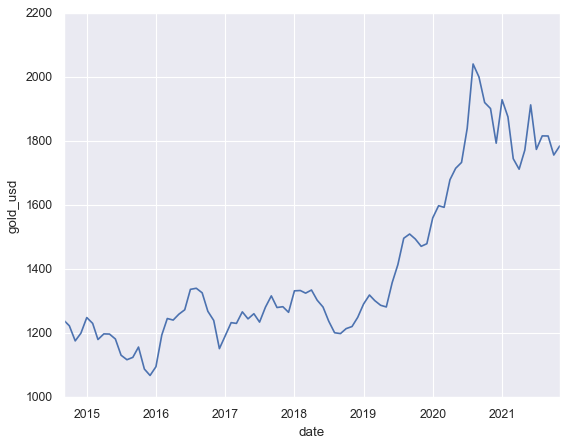

In [137]:
sns.lineplot(data=monthly_data, x="date", y="gold_usd")

From this graphic what we can conclude is that the gold was a great 'reserve of value' during the crisis of the Pandemic. 

In [142]:
#We compute the difference between the closing price at the very first day of each month
monthly_data['gold_usd_diff'] = monthly_data['gold_usd'].diff()

#We compute the percentage difference between the closing price at the very first day of each month
monthly_data['return_Gold'] = monthly_data['gold_usd'].pct_change()

In [143]:
monthly_data['day'] = monthly_data['date'].dt.day
monthly_data['month'] = monthly_data['date'].dt.month
monthly_data['year'] = monthly_data['date'].dt.year


In [144]:
monthly_data=monthly_data.set_index('date')

In [313]:
#We agroup the AVG percentage difference for each Month
monthGoldSummary=monthly_data.groupby(['year','month'])[['return_Gold']].sum()
monthGoldSummary

return_Gold
year month             
2014 9         0.000000
     10       -0.014311
     11       -0.038537
     12        0.020424
2015 1         0.040729
...                 ...
2021 7        -0.072679
     8         0.023777
     9        -0.000165
     10       -0.032752
     11        0.015991

[87 rows x 1 columns]

In [314]:
#We agroup the AVG percentage difference for each Year
yearGoldSummary=monthly_data.groupby(['year'])[['return_Gold']].sum()
yearGoldSummary

,return_Gold
year,
2014,-0.032424
2015,-0.111174
2016,0.085985
2017,0.097563
2018,-0.009312
2019,0.174329
2020,0.206051
2021,0.008215


In [315]:
totalGoldReturn=yearGoldSummary.sum()
print('The Total return the Gold registered between the period {} & {}, was of {:.2f}%'. 
format(monthly_data.index.min(),monthly_data.index.max(),totalGoldReturn[0]*100))

return_Gold    0.419233
dtype: float64

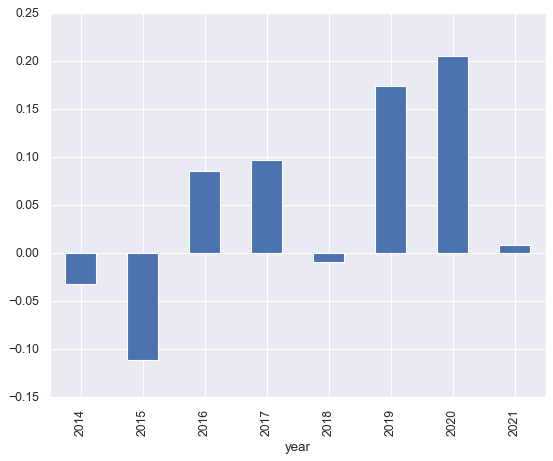

In [316]:
yearGoldSummary['return_Gold'].plot(kind='bar')
plt.show()

From this graphic we can see that in three years, the Gold had negative returns.
While, as we explained before, in 2020 it was clearly a chosen instrument for preserving the value (at least at the beginning of the Pandemic).

#### Volatility

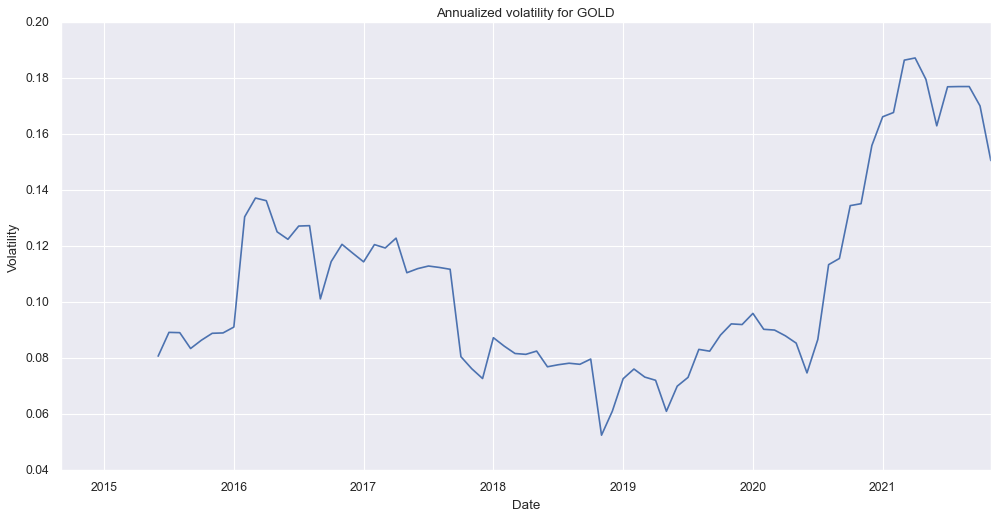

In [317]:
# compute volatility using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 10
returns = np.log(monthly_data['gold_usd']/monthly_data['gold_usd'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for GOLD')
plt.show()

In [318]:
monthly_data['%_var']=monthly_data['return_Gold']*100

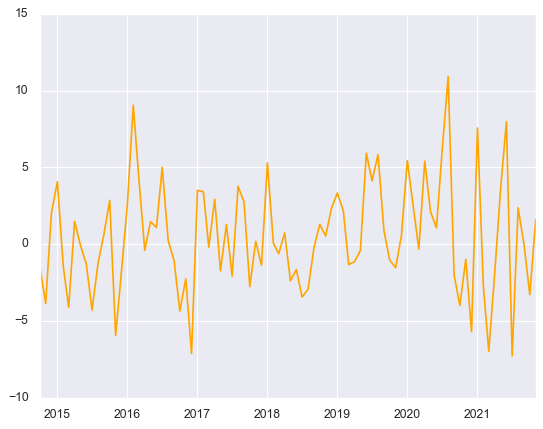

Last Monthly volatility:  3.62%
Last Annual volatility:  12.53%


In [319]:
# Plot the price returns
plt.plot(monthly_data['%_var'], color = 'orange')
plt.show()

# Calculate daily std of returns
gold_std_monthly = monthly_data['%_var'].std()
print('Last Monthly volatility: ', '{:.2f}%'.format(gold_std_monthly))

# Convert daily volatility to annaul volatility
gold_std_annual = math.sqrt(252/21) * gold_std_monthly
print ('Last Annual volatility: ', '{:.2f}%'.format(gold_std_annual))

We can see that the Annual volatility is relativatly low. Nevertheless, during the period 2020-2021 we can see an increase in this value.

In [320]:
#We agroup the AVG percentage difference for each Year
yearGoldSummary['volatility_Gold']=monthly_data.groupby(['year'])[['%_var']].std()*math.sqrt(212/21)
yearGoldSummary['return_Gold']=yearGoldSummary['return_Gold']*100
yearGoldSummary

,return_Gold,volatility_Gold
year,,
2014,-3.242388,9.416237
2015,-11.117356,9.403313
2016,8.598460,13.726040
2017,9.756280,7.725525
2018,-0.931160,7.736442
2019,17.432891,8.803491
2020,20.605064,15.012257
2021,0.821480,16.340498


## Bitcoin

In [212]:
#We start the Bitcoin Analysis
bitcoin.describe()

,open,high,low,close,volume,day,month,year,return,%var,return_BTC
count,2615.000000,2615.000000,2615.000000,2615.000000,2.615000e+03,2619.000000,2619.000000,2619.000000,2618.000000,2618.000000,2618.000000
mean,10051.643066,10334.482966,9750.736512,10073.814423,1.400155e+10,15.731959,6.605956,2017.787705,0.002635,0.263500,0.002635
std,14892.430109,15326.320248,14422.269302,14923.069664,1.993158e+10,8.800823,3.452026,2.087648,0.039025,3.902489,0.039025
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,1.000000,1.000000,2014.000000,-0.371695,-37.169539,-0.371695
25%,582.071015,588.960998,575.311981,582.555999,7.489110e+07,8.000000,4.000000,2016.000000,-0.012817,-1.281712,-0.012817
50%,5745.599121,5865.881836,5544.089844,5750.799805,4.679500e+09,16.000000,7.000000,2018.000000,0.001996,0.199600,0.001996
75%,9866.986328,10136.996094,9642.615235,9870.199219,2.287606e+10,23.000000,10.000000,2020.000000,0.018371,1.837115,0.018371
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,31.000000,12.000000,2021.000000,0.252472,25.247169,0.252472


### Close Price

<AxesSubplot:xlabel='date', ylabel='close'>

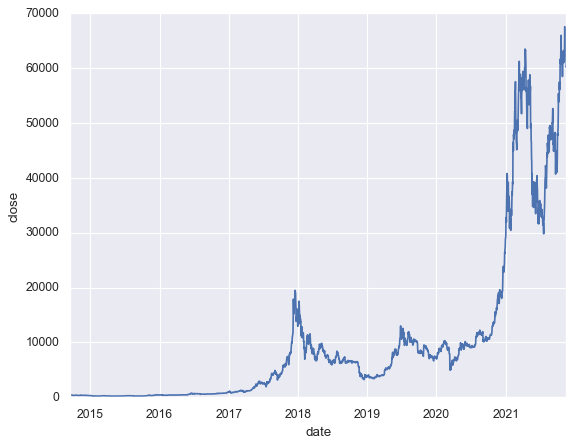

In [166]:
sns.lineplot(data=bitcoin, x="date", y="close")

As we can see, the BTC had it's 'boom' from 2020.
What it is really shocking it's to see how fast the price went down after reaching it's first maximum at the beginning of 2021. 

<AxesSubplot:xlabel='close', ylabel='Density'>

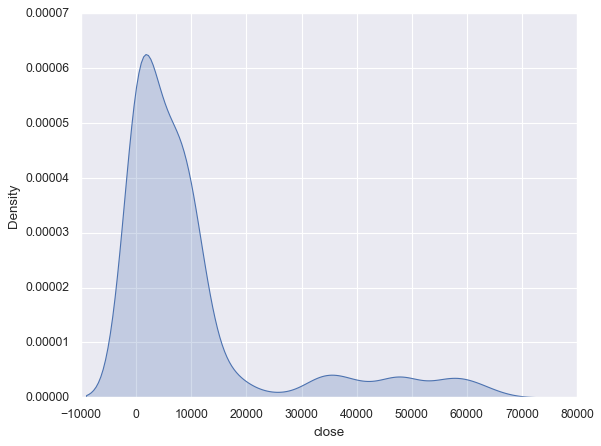

In [167]:
sns.kdeplot(bitcoin['close'],shade=True)

In [168]:
bitcoin['day'] = bitcoin['date'].dt.day
bitcoin['month'] = bitcoin['date'].dt.month
bitcoin['year'] = bitcoin['date'].dt.year

In [184]:
bitcoin['return_BTC']=bitcoin['close'].pct_change()

In [ ]:
bitcoin.set_index('date',inplace=True)

In [186]:
#firstDaysBTC=bitcoin.set_index('date').resample('BMS').first()

#We compute the difference between the closing price at the very first day of each month
#firstDaysBTC['close_diff'] = firstDaysBTC['close'].diff()

#We compute the percentage difference between the closing price at the very first day of each month
#firstDaysBTC['close_diff_perc'] = firstDaysBTC['close'].pct_change()

In [188]:
#We agroup the AVG percentage difference for each Month
monthBTCSummary=bitcoin.groupby(['year','month'])[['return_BTC']].sum()
monthBTCSummary

return_BTC
year month            
2014 9       -0.154446
     10      -0.118051
     11       0.132413
     12      -0.157695
2015 1       -0.299671
...                ...
2021 7        0.187079
     8        0.141330
     9       -0.050939
     10       0.356667
     11      -0.010983

[87 rows x 1 columns]

In [189]:
#We agroup the AVG percentage difference for each Year
yearBTCSummary=bitcoin.groupby(['year'])[['return_BTC']].sum()
yearBTCSummary

,return_BTC
year,
2014,-0.297779
2015,0.538500
2016,0.922590
2017,3.143504
2018,-0.996154
2019,0.882330
2020,1.677015
2021,1.028430


In [190]:
totalBTCReturn=yearBTCSummary.sum()
print('The Total return the BTC registered between the period {} & {}, was of {:.2f}%'. 
format(bitcoin.index.min(),bitcoin.index.max(),totalBTCReturn[0]*100))

return_BTC    6.898436
dtype: float64

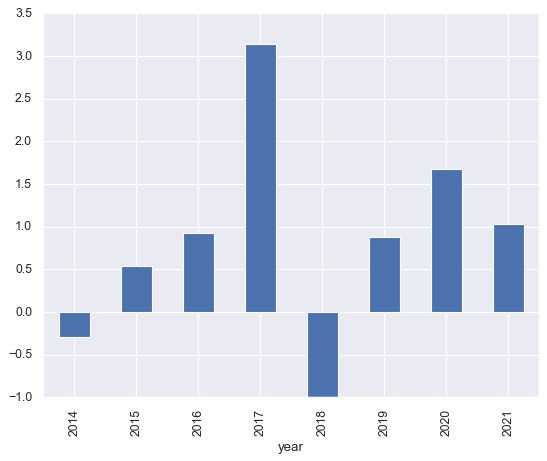

In [191]:
yearBTCSummary['return_BTC'].plot(kind='bar')
plt.show()

As we can see, except for the year 2014 and 2018, where the BTC shown a negative return, three of the other 6 periods, shown a return above 100%, and one of them above 300%.

However, in 2018 the return was almost -100% (meaning that its price went completetly down). This talks about a high volatility: big chances of winning a lot of money, and chances of losing it all.

### Volatility

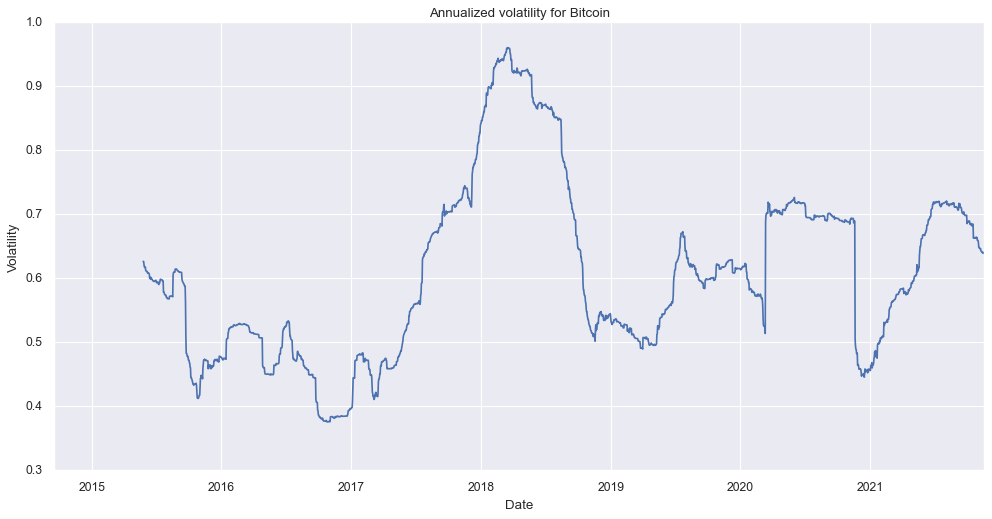

In [192]:
# compute volatility using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 252
returns = np.log(bitcoin['close']/bitcoin['close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for Bitcoin')
plt.show()

The volatility here is explicit. As we were just talking in the previous point, the year 2018 was a negative year for the BTC, with a huge volatility. 

In [194]:
bitcoin['%var']=bitcoin['return_BTC']*100

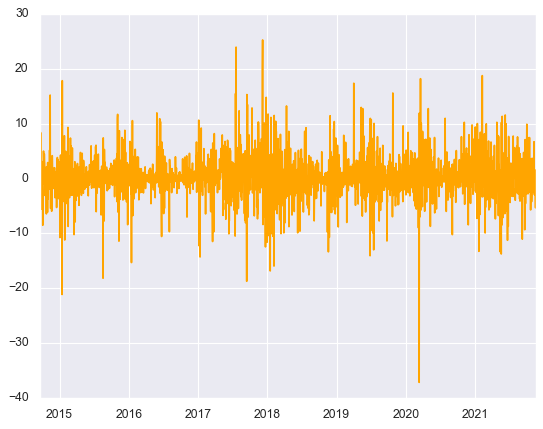

Daily volatility:  3.90%
Monthly volatility:  17.88%
Annual volatility:  61.95%


In [195]:
# Plot the price returns
plt.plot(bitcoin['%var'], color = 'orange')
plt.show()

# Calculate daily std of returns
btc_std_daily = bitcoin['%var'].std()
print('Daily volatility: ', '{:.2f}%'.format(btc_std_daily))

# Convert daily volatility to monthly volatility
btc_std_monthly = math.sqrt(21) * btc_std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(btc_std_monthly))

# Convert daily volatility to annaul volatility
btc_std_annual = math.sqrt(252) * btc_std_daily
print ('Annual volatility: ', '{:.2f}%'.format(btc_std_annual))

We can see that the volatility is bigger than the one of the other instruments.

In [196]:
#We agroup the AVG percentage difference for each Month
monthBTCSummary['volatility_BTC']=bitcoin.groupby(['year','month'])[['%var']].std()*math.sqrt(21)
monthBTCSummary['return_BTC']=monthBTCSummary['return_BTC']*100
monthBTCSummary

return_BTC  volatility_BTC
year month                            
2014 9      -15.444605       20.187510
     10     -11.805149       14.813896
     11      13.241285       17.860419
     12     -15.769479       10.530948
2015 1      -29.967121       33.781155
...                ...             ...
2021 7       18.707916       14.273884
     8       14.133039       15.127627
     9       -5.093908       18.105096
     10      35.666690       16.109258
     11      -1.098333       12.769859

[87 rows x 2 columns]

In [197]:
#We agroup the AVG percentage difference for each Month
yearBTCSummary['volatility_BTC']=bitcoin.groupby(['year'])[['%var']].std()*math.sqrt(212)
yearBTCSummary['return_BTC']=yearBTCSummary['return_BTC']*100
yearBTCSummary

,return_BTC,volatility_BTC
year,,
2014,-29.777948,48.911358
2015,53.849994,52.426581
2016,92.258984,36.598181
2017,314.350411,72.683394
2018,-99.615418,61.779910
2019,88.233041,51.868930
2020,167.701489,54.910628
2021,102.843046,62.705861


## Analyzing the Combination of the instruments

In [322]:
combinedYearSummary = pd.merge(left=yearBTCSummary, right=yearGoldSummary, left_on='year', right_on='year')
combinedYearSummary = pd.merge(left=combinedYearSummary, right=yearSP500Summary, left_on='year', right_on='year')

In [323]:
#Returns per year
combinedYearSummary

,return_BTC,volatility_BTC,return_Gold,volatility_Gold,return_SP500,volatility_SP500
year,,,,,,
2014,-29.777948,48.911358,-3.242388,9.416237,3.104681,12.848009
2015,53.849994,52.426581,-11.117356,9.403313,0.467803,14.210976
2016,92.258984,36.598181,8.598460,13.726040,9.964615,12.010800
2017,314.350411,72.683394,9.756280,7.725525,17.975739,6.132142
2018,-99.615418,61.779910,-0.931160,7.736442,-4.992090,15.639818
2019,88.233041,51.868930,17.432891,8.803491,26.158788,11.439470
2020,167.701489,54.910628,20.605064,15.012257,21.053817,31.580373
2021,102.843046,62.705861,0.821480,16.340498,22.738089,11.422415


### Graphics

__Close Price of the three instruments__

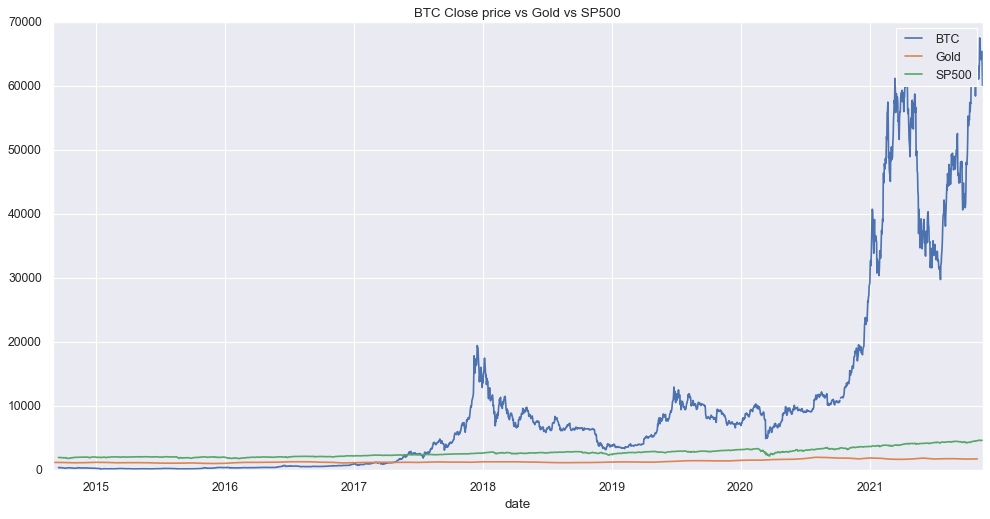

In [324]:
bitcoin['close'].plot(label = 'BTC', figsize = (15,7))
monthly_data['gold_usd'].plot(label = "Gold")
sp500['close'].plot(label = "SP500")
plt.title('BTC Close price vs Gold vs SP500')
plt.legend()

__Now, let's see the returns of the three instruments__

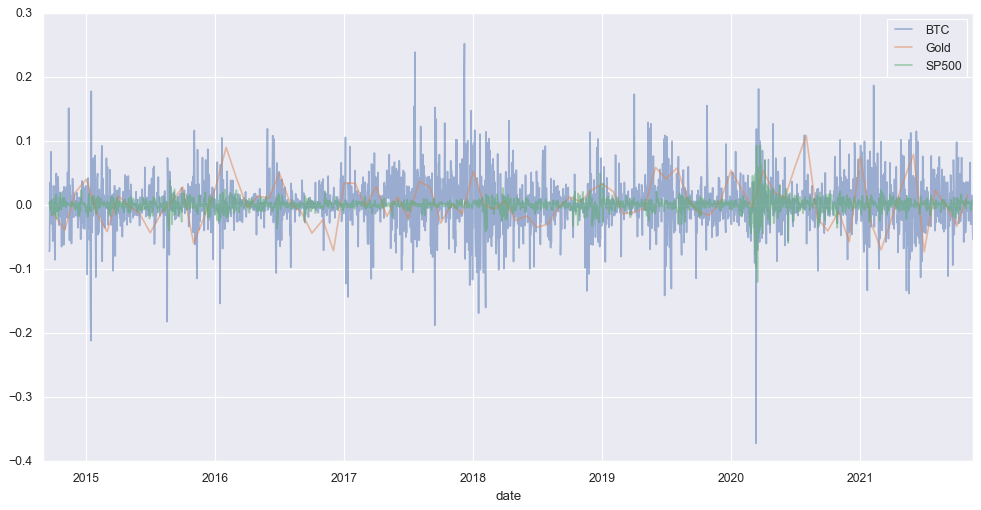

In [354]:
#Returns per Instrument
bitcoin['returns'] = (bitcoin['close']/bitcoin['close'].shift(1)) -1
monthly_data['returns'] = (monthly_data['gold_usd']/monthly_data['gold_usd'].shift(1))-1
sp500['returns'] = (sp500['close']/sp500['close'].shift(1)) -1
bitcoin['returns'].plot( label = 'BTC', alpha = 0.5, figsize = (15,7))
monthly_data['returns'].plot( label = 'Gold', alpha = 0.5)
sp500['returns'].plot( label = 'SP500', alpha = 0.5)
plt.legend()

__Now, let's see graphically the volatility of the three instruments__

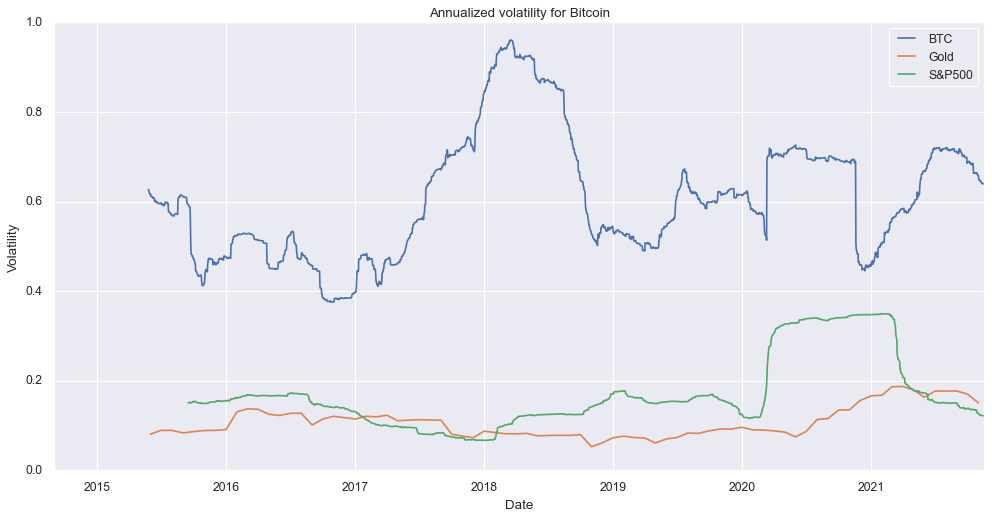

In [353]:
# compute volatility using Pandas rolling and std methods, the trading days is set to 252 days
TRADING_DAYS = 252
returns = np.log(bitcoin['close']/bitcoin['close'].shift(1))
returns.fillna(0, inplace=True)
volatilityBTC = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)

TRADING_DAYS_GOLD = 10
returnsGold = np.log(monthly_data['gold_usd']/monthly_data['gold_usd'].shift(1))
returnsGold.fillna(0, inplace=True)
volatilityGOLD = returnsGold.rolling(window=TRADING_DAYS_GOLD).std()*np.sqrt(TRADING_DAYS_GOLD)


TRADING_DAYS = 252
returnsSP500 = np.log(sp500['close']/sp500['close'].shift(1))
returnsSP500.fillna(0, inplace=True)
volatilitySP500 = returnsSP500.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)


fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatilityBTC.plot(ax=ax1,label='BTC')
volatilityGOLD.plot(ax=ax1,label='Gold')
volatilitySP500.plot(ax=ax1,label='S&P500')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for the three instruments')
ax1.legend()
plt.show()

- As we can see, BTC has higger closing prices than the Gold and SP500.
- BTC has wider returns, having not only the absolute maximums, but also the absolute minimums.
- And, finally, if we thought S&P500 had a high volatility, is because we didn't use the same scale to put it next to the BTC graphic. The volatility BTC is big per se, but huge in comparison with the other two instruments.

__Another Graphic__

In [325]:
combinedYearSummaryReturn=combinedYearSummary[['return_BTC','return_Gold','return_SP500']]

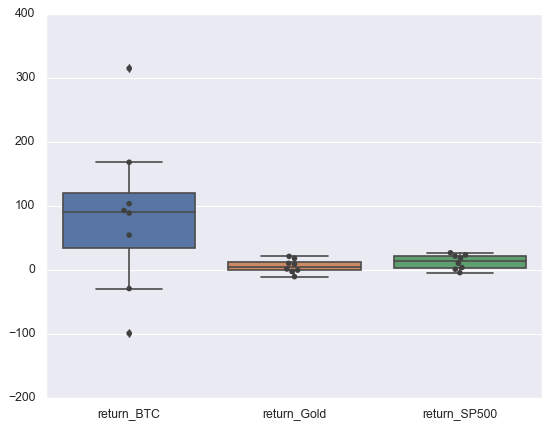

In [326]:
ax = sns.boxplot(data=combinedYearSummaryReturn)
ax = sns.swarmplot(data=combinedYearSummaryReturn, color=".25")

We see long-distanced-outliers in the BTC price. This talks about a high volatility.

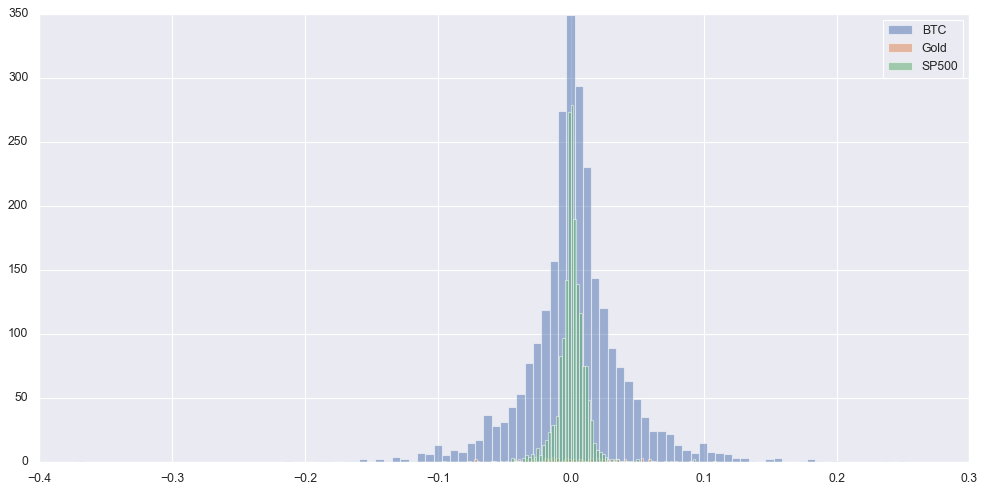

In [327]:
#Returns per Instrument
bitcoin['returns'] = (bitcoin['close']/bitcoin['close'].shift(1)) -1
monthly_data['returns'] = (monthly_data['gold_usd']/monthly_data['gold_usd'].shift(1))-1
sp500['returns'] = (sp500['close']/sp500['close'].shift(1)) -1
bitcoin['returns'].hist(bins = 100, label = 'BTC', alpha = 0.5, figsize = (15,7))
monthly_data['returns'].hist(bins = 100, label = 'Gold', alpha = 0.5)
sp500['returns'].hist(bins = 100, label = 'SP500', alpha = 0.5)
plt.legend()

Here we see the distribution of the returns. Gold it's almost impossible to see, taking into consideration that it is using the BTC scale to be able to fit its values in the general graphic. This mean that the Gold returns are much smaller that the BTC ones.
Also, with this graphic we can see the presence of many outliers.

SP500 has a better curve in terms of risk-taking (volatility) than BTC. It means it's a safer instrument and with good returns.

In [328]:
print('The total return of each instrument:')
print('The return of Gold was: {:.2f}%'.format(monthly_data['returns'].sum()*100))
print('The return of BTC was: {:.2f}%'.format(bitcoin['returns'].sum()*100))
print('The return of S&P500 was: {:.2f}%'.format(sp500['returns'].sum()*100))



The total return of each instrument:
The return of Gold was: 41.92%
The return of BTC was: 684.05%
The return of S&P500 was: 96.47%


Summary: BTC reported higher return in the period than GOLD and SP500. However, it is shown that with a higher volatility (risk) involved.

----
# 2. Analyze Bitcoin's returns and volatility profile. Do you believe it could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?

BTC could help to improve the performance of any portfolio. However, due to its volatility, a higher risk must be assumed by the stakeholder.

Per year, the BTC has shown a high volatility, and only in the last years has shown outstanding returns

In [329]:
monthBTCSummary

return_BTC  volatility_BTC
year month                            
2014 9      -15.444605       20.187510
     10     -11.805149       14.813896
     11      13.241285       17.860419
     12     -15.769479       10.530948
2015 1      -29.967121       33.781155
...                ...             ...
2021 7       18.707916       14.273884
     8       14.133039       15.127627
     9       -5.093908       18.105096
     10      35.666690       16.109258
     11      -1.098333       12.769859

[87 rows x 2 columns]

<AxesSubplot:xlabel='year,month'>

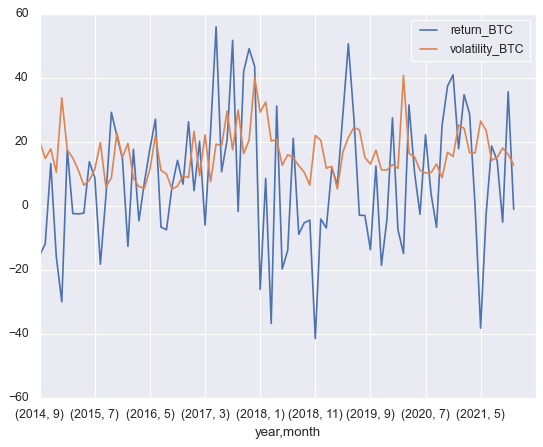

In [330]:
monthBTCSummary.plot()

Monthly, the BTC it has shown a big volatility.

In [331]:
yearBTCSummary

,return_BTC,volatility_BTC
year,,
2014,-29.777948,48.911358
2015,53.849994,52.426581
2016,92.258984,36.598181
2017,314.350411,72.683394
2018,-99.615418,61.779910
2019,88.233041,51.868930
2020,167.701489,54.910628
2021,102.843046,62.705861


<AxesSubplot:xlabel='year'>

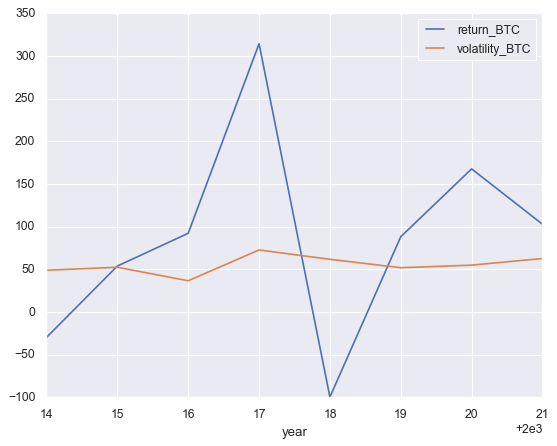

In [332]:
yearBTCSummary.plot()

Supposing our portfolio was made of these three instruments: GOLD, BTC & SP500:

In [333]:
combinedTotalYearSummary = pd.merge(left=combinedYearSummary, right=yearCPISummary, left_on='year', right_on='year')
combinedTotalYearSummary

,return_BTC,volatility_BTC,return_Gold,volatility_Gold,return_SP500,volatility_SP500,%_var_CPI
year,,,,,,,
2014,-29.777948,48.911358,-3.242388,9.416237,3.104681,12.848009,-0.715913
2015,53.849994,52.426581,-11.117356,9.403313,0.467803,14.210976,0.508540
2016,92.258984,36.598181,8.598460,13.726040,9.964615,12.010800,1.683188
2017,314.350411,72.683394,9.756280,7.725525,17.975739,6.132142,2.183305
2018,-99.615418,61.779910,-0.931160,7.736442,-4.992090,15.639818,2.158606
2019,88.233041,51.868930,17.432891,8.803491,26.158788,11.439470,2.035762
2020,167.701489,54.910628,20.605064,15.012257,21.053817,31.580373,1.174729
2021,102.843046,62.705861,0.821480,16.340498,22.738089,11.422415,6.118012


In [334]:
print('We see that {} out of {} times, BTC wont against inflation'.format((combinedTotalYearSummary['return_BTC']>combinedTotalYearSummary['%_var_CPI']).sum(),combinedTotalYearSummary.return_BTC.count()))

print('We see that {} out of {} times, Gold wont against inflation'.format((combinedTotalYearSummary['return_Gold']>combinedTotalYearSummary['%_var_CPI']).sum(),combinedTotalYearSummary.return_Gold.count()))
print('We see that {} out of {} times, SP wont against inflation'.format((combinedTotalYearSummary['return_SP500']>combinedTotalYearSummary['%_var_CPI']).sum(),combinedTotalYearSummary.return_SP500.count()))

6

4

6

- We see that in 6 out of 8 times, BTC won against the inflation.
- We see that in 4 out of 8 times, GOLD won against the inflation
- We see that in 6 out of 8 times, SP500 won against the inflation.

In [335]:
print('BTC has shown a real return of {:.2f} %'.format(combinedTotalYearSummary['return_BTC'].sum()-combinedTotalYearSummary['%_var_CPI'].sum()))
print('Gold has shown a real return of {:.2f} %'.format(combinedTotalYearSummary['return_Gold'].sum()-combinedTotalYearSummary['%_var_CPI'].sum()))
print('S&P500 has shown a real return of {:.2f} %'.format(combinedTotalYearSummary['return_SP500'].sum()-combinedTotalYearSummary['%_var_CPI'].sum()))

BTC has shown a real return of 674.70 %
Gold has shown a real return of 26.78 %
S&P500 has shown a real return of 81.33 %


- All the instruments had positive real returns (minus inflation).
- The gold had an extraordinary year, in terms of returns, in the year 2020 (also 2019 was a good year).
- In fact, if it wasn't for the years 2019 and 2020, Gold would had lost against the inflation in a huge way.

## CPI Analysis

In [336]:
monthly_data

,gold_usd,cpi_us,gold_usd_diff,return_Gold,day,month,year,%_var,returns,cpi_us_diff,cpi_us_diff_perc,%_var_CPI
date,,,,,,,,,,,,
2014-09-01,1241.330,237.852,NaN,NaN,1,9,2014,NaN,NaN,NaN,NaN,NaN
2014-10-01,1223.565,238.031,-17.765,-0.014311,1,10,2014,-1.431126,-0.014311,0.179,0.000753,0.075257
2014-11-01,1176.413,237.433,-47.152,-0.038537,1,11,2014,-3.853657,-0.038537,-0.598,-0.002512,-0.251228
2014-12-01,1200.440,236.151,24.027,0.020424,1,12,2014,2.042395,0.020424,-1.282,-0.005399,-0.539942
2015-01-01,1249.333,234.812,48.893,0.040729,1,1,2015,4.072923,0.040729,-1.339,-0.005670,-0.567010
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,1774.800,271.696,-139.100,-0.072679,1,7,2021,-7.267882,-0.072679,2.501,0.009291,0.929066
2021-08-01,1817.000,273.003,42.200,0.023777,1,8,2021,2.377733,0.023777,1.307,0.004811,0.481052
2021-09-01,1816.700,273.567,-0.300,-0.000165,1,9,2021,-0.016511,-0.000165,0.564,0.002066,0.206591


In [277]:
#We compute the difference between the closing price at the very first day of each month
monthly_data['cpi_us_diff'] = monthly_data['cpi_us'].diff()

#We compute the percentage difference between the closing price at the very first day of each month
monthly_data['cpi_us_diff_perc'] = monthly_data['cpi_us'].pct_change()

monthly_data['%_var_CPI']=monthly_data['cpi_us_diff_perc']*100

In [278]:
monthly_data

,gold_usd,cpi_us,gold_usd_diff,return_Gold,day,month,year,%_var,returns,cpi_us_diff,cpi_us_diff_perc,%_var_CPI
date,,,,,,,,,,,,
2014-09-01,1241.330,237.852,NaN,NaN,1,9,2014,NaN,NaN,NaN,NaN,NaN
2014-10-01,1223.565,238.031,-17.765,-0.014311,1,10,2014,-1.431126,-0.014311,0.179,0.000753,0.075257
2014-11-01,1176.413,237.433,-47.152,-0.038537,1,11,2014,-3.853657,-0.038537,-0.598,-0.002512,-0.251228
2014-12-01,1200.440,236.151,24.027,0.020424,1,12,2014,2.042395,0.020424,-1.282,-0.005399,-0.539942
2015-01-01,1249.333,234.812,48.893,0.040729,1,1,2015,4.072923,0.040729,-1.339,-0.005670,-0.567010
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,1774.800,271.696,-139.100,-0.072679,1,7,2021,-7.267882,-0.072679,2.501,0.009291,0.929066
2021-08-01,1817.000,273.003,42.200,0.023777,1,8,2021,2.377733,0.023777,1.307,0.004811,0.481052
2021-09-01,1816.700,273.567,-0.300,-0.000165,1,9,2021,-0.016511,-0.000165,0.564,0.002066,0.206591


In [337]:
#We agroup the AVG percentage difference for each Month
monthCPISummary=monthly_data.groupby(['year','month'])[['%_var_CPI']].mean()
monthCPISummary

%_var_CPI
year month           
2014 9            NaN
     10      0.075257
     11     -0.251228
     12     -0.539942
2015 1      -0.567010
...               ...
2021 7       0.929066
     8       0.481052
     9       0.206591
     10      0.271597
     11      0.830812

[87 rows x 1 columns]

In [338]:
#We agroup the AVG percentage difference for each Year
yearCPISummary=monthly_data.groupby(['year'])[['%_var_CPI']].sum()
yearCPISummary

,%_var_CPI
year,
2014,-0.715913
2015,0.508540
2016,1.683188
2017,2.183305
2018,2.158606
2019,2.035762
2020,1.174729
2021,6.118012


### BTC & CPI
__Monthly Analysis__

Let's analyze the return of the BTC against the inflation

In [339]:
combinedMonthSummary = pd.merge(left=monthBTCSummary, right=monthCPISummary, left_on=['year','month'], right_on=['year','month'])

In [340]:
combinedMonthSummary

return_BTC  volatility_BTC  %_var_CPI
year month                                       
2014 9      -15.444605       20.187510        NaN
     10     -11.805149       14.813896   0.075257
     11      13.241285       17.860419  -0.251228
     12     -15.769479       10.530948  -0.539942
2015 1      -29.967121       33.781155  -0.567010
...                ...             ...        ...
2021 7       18.707916       14.273884   0.929066
     8       14.133039       15.127627   0.481052
     9       -5.093908       18.105096   0.206591
     10      35.666690       16.109258   0.271597
     11      -1.098333       12.769859   0.830812

[87 rows x 3 columns]

In [341]:
combinedMonthSummary['difference']=combinedMonthSummary['return_BTC']-combinedMonthSummary['%_var_CPI']
combinedMonthSummary=combinedMonthSummary.iloc[1:,:]
combinedMonthSummary

return_BTC  volatility_BTC  %_var_CPI  difference
year month                                                   
2014 10     -11.805149       14.813896   0.075257  -11.880406
     11      13.241285       17.860419  -0.251228   13.492513
     12     -15.769479       10.530948  -0.539942  -15.229538
2015 1      -29.967121       33.781155  -0.567010  -29.400111
     2       17.627373       17.465681  -0.470589   18.097963
...                ...             ...        ...         ...
2021 7       18.707916       14.273884   0.929066   17.778850
     8       14.133039       15.127627   0.481052   13.651987
     9       -5.093908       18.105096   0.206591   -5.300499
     10      35.666690       16.109258   0.271597   35.395093
     11      -1.098333       12.769859   0.830812   -1.929145

[86 rows x 4 columns]

As we don't have the variation of inflation of the first available month of 2014, we cannot calculate the real return of the BTC. That is why, we drop the row.

In [342]:
totalRealReturn=combinedMonthSummary['return_BTC'].sum()-combinedMonthSummary['%_var_CPI'].sum()
totalRealReturn

690.1419761351415

In [343]:
combinedMonthSummary[combinedMonthSummary['difference']>0].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 49 entries, (2014, 11) to (2021, 10)
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   return_BTC      49 non-null     float64
 1   volatility_BTC  49 non-null     float64
 2   %_var_CPI       49 non-null     float64
 3   difference      49 non-null     float64
dtypes: float64(4)
memory usage: 2.5 KB


In 49 out of 86 cases, the monthly BTC return won against the inflation.

### Yearly Analysis

In [344]:
combinedMonthSummary.groupby('year').sum()

,return_BTC,volatility_BTC,%_var_CPI,difference
year,,,,
2014,-14.333343,43.205263,-0.715913,-13.617430
2015,53.849994,175.798044,0.508540,53.341454
2016,92.258984,124.065327,1.683188,90.575796
2017,314.350411,254.912340,2.183305,312.167106
2018,-99.615418,218.749110,2.158606,-101.774024
2019,88.233041,184.179939,2.035762,86.197279
2020,167.701489,183.089250,1.174729,166.526761
2021,102.843046,209.214904,6.118012,96.725034


In [345]:
combinedMonthSummary.groupby('year')[['difference']].sum()

,difference
year,
2014,-13.617430
2015,53.341454
2016,90.575796
2017,312.167106
2018,-101.774024
2019,86.197279
2020,166.526761
2021,96.725034


In terms of Analysis per year, the BTC won 6 out of the 8 years of analysis, against inflation.

In [346]:
combinedMonthSummary['difference'].sum()

690.1419761351415

In [347]:
print('The real return of the BTC investment in the period {} to {} was of {:.2f}%'.format(combinedMonthSummary.index.min(),combinedMonthSummary.index.max(),totalRealReturn))

The real return of the BTC investment in the period (2014, 10) to (2021, 11) was of 690.14%


The ones who held BTC won 690% on top of the inflation 

<i> (Let's take into consideration that we drop September '14 as we don't have the inflation variation of that month). In the previous chaper we considered September as part of the analysis, but we didn't consider the inflation.

----
# 3. The CFO is looking to lower volatility in the fund. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk.

Before answering this question we need to ask ourselves the horizon of the investment. 
GOLD has not volatility at all, but with this also almost no return in the short term. Having this said, firstly we need to know the horizon of the invesment: Short or Long Term.

In [348]:
combinedTotalYearSummary

,return_BTC,volatility_BTC,return_Gold,volatility_Gold,return_SP500,volatility_SP500,%_var_CPI
year,,,,,,,
2014,-29.777948,48.911358,-3.242388,9.416237,3.104681,12.848009,-0.715913
2015,53.849994,52.426581,-11.117356,9.403313,0.467803,14.210976,0.508540
2016,92.258984,36.598181,8.598460,13.726040,9.964615,12.010800,1.683188
2017,314.350411,72.683394,9.756280,7.725525,17.975739,6.132142,2.183305
2018,-99.615418,61.779910,-0.931160,7.736442,-4.992090,15.639818,2.158606
2019,88.233041,51.868930,17.432891,8.803491,26.158788,11.439470,2.035762
2020,167.701489,54.910628,20.605064,15.012257,21.053817,31.580373,1.174729
2021,102.843046,62.705861,0.821480,16.340498,22.738089,11.422415,6.118012


# Summary
In order to achieve a low volatility portfolio, we should definetly avoid buying cryptocurrencies (BTC in this case).

We have shown the return rates, the volatility and the coverage against inflation of all the instruments. BTC (and all the cryptos), of course apart for being fashion, has some specific characteristics that makes it valuable. One of its reasons is the descentralization, but this is another topic to discuss. Nevertheless, the risk involved in that investment might be huge for some 'stomachs'.

S&P500 has shown a big volatility in the year 2020, but, with exception of Gold, which instrument hasn't shown in? The first Pandemic year will be a year for further studies in the future as no one knew how to react as anyone knew what was going on nor what was going to happen.

Withouth any doubt, measuring by volatility first, and return after, S&P500 is the biggest winner for a medium horizon and a relativetly low volatility (risk).

Having this said, and taking into consideration that the Gold was chosen as a 'value cover', I would say that for a 5 years horizon we could get 80% of S&P500 and 20% of Gold.

----------